# CLASIFICACIÓN

##  📌 ACTIVIDAD 1:  MNIST

MNIST es un conjunto de pequeñas imágenes de dígitos escritos por estudiantes de institutos y empleados del censo de USA. Cada imagen está etiquetada con el dígito que representa.

Crea el notebook saa_02_p04_a1_<tus_iniciales>.ipynb donde realizar esta actividad

Nota: recuerda que los datasets cargados por scikit-Learn tienen estructura de diccionario incluyendo entre otras las claves:

• DESCR: descripción del dataset.

• data: DataFrame de pandas con una fila por instancia o ejemplo de datos y una columna por cada característica.

• target: un array con los labels de cada instancia

 Comprobamos la cantidad de datos y separamos predictoras y target:

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
print("Claves de mnist: ", mnist.keys())

X, y = mnist["data"], mnist["target"]
print("Dimensiones de X:", X.shape)

Claves de mnist:  dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Dimensiones de X: (70000, 784)


### PASO 1: PREPARAR LOS DATOS

Tiene imágenes cada una con 784 características porque son de tamaño 28×28 pixels y cada pixel 
representa la intensidad de luz (0 blanco a 255 el negro). Tiene aproximadamente la misma cantidad 
de ejemplos para cada dígito (0, 1, …, 9).

Para dibujar una de ellos lo único que tienes que hacer es extraer una instancia, cambiarle la estructura a 28×28 y usar la función imshow() de matplotlib:

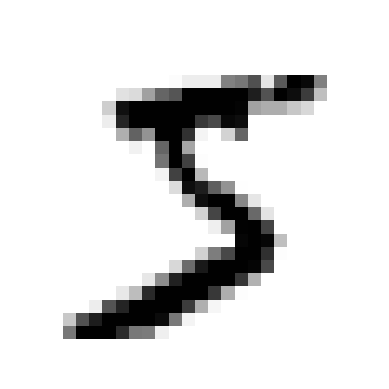

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

un_digito = X.iloc[0].to_numpy()
imagen_un_digito = un_digito.reshape(28, 28)

plt.imshow(imagen_un_digito, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

Vamos a entrenar modelos de clasificación binaria que aprendan a identificar los números 2 del resto. 
Primero vamos a cambiar el tipo de datos del target porque nos interesa que sean numéricos 0 (si no es 
un 2 y 1 cuando sea la imagen de un dígito 2).

Además vamos a generar el dataset de train y test, y luego lo vamos a adaptar para que nos sirva para entrenar el clasificador del 2. El tamaño del test lo dejamos al 1% porque hay bastantes instancias:

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

y = y.iloc[:].to_numpy()
y = y.astype(np.uint8)

print("Nuevo tipo de y[0]:", type(y[0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=123)

y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)  #True para todas las instancias que sean del dígito 2

Nuevo tipo de y[0]: <class 'numpy.uint8'>


#### ENTREGAR:

 a) Modifica el código para que en la variable un_digito quede cargada la primera instancia que 
sea un 2.

 b) Cuando particiones los datos y realices otras operaciones aleatorias utiliza una semilla 
aleatoria que coincida con la longitud de tu nombre concatenada a la de tu primer apellido y 
concatenada a la de tu segundo apellido. En mi caso sería el valor 449 porque "Jose"=4, 
"Rosa"=4 y "=9.

 c) Indica cuantas instancias tenemos para entrenar y cuantas para testear

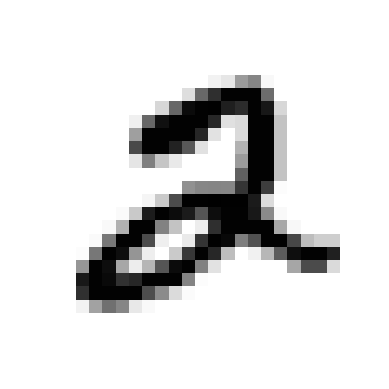

Instancias de entrenamiento: 63000
Instancias de testeo: 7000


In [5]:
#a) Encontrar la primera instancia que sea un 2
dice_dos = np.where(y == 2)[0][0]  # Encuentra el primer índice donde y es 2
un_digito = X.iloc[dice_dos].to_numpy()
imagen_un_digito = un_digito.reshape(28, 28)

#Mostrar la imagen del primer dígito 2
plt.imshow(imagen_un_digito, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

#b) Semilla aleatoria personalizada
semilla_aleatoria = int("475")  #longitud de mi nombre

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=semilla_aleatoria)

#c) Imprimir cantidad de instancias para entrenamiento y testeo
print(f"Instancias de entrenamiento: {X_train.shape[0]}")
print(f"Instancias de testeo: {X_test.shape[0]}")

### PASO 2: ENTRENAR UN MODELO QUE IDENTIFIQUE EL DÍGITO 2

Para identificar el número 2 del resto, necesitamos un clasificador binario (2 clases en las que clasificar una instancia).

Usamos uno que use Descenso por Gradiente Estocástico (SGDClassifier) que es escalable (rápido con muchas filas o instancias) y apto para on-line al ir aprendiendo instancia a 
instancia de manera independiente

In [6]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=123)
sgd.fit(X_train, y_train_2)

SGDClassifier(random_state=123)

 Para comprobar si se ha entrenado bien podemos probar la predicción que hace con algún ejemplo 
que conozcamos como por ejemplo el que tenemos en un_digito:

In [7]:
print("Predice un 2?:", sgd.predict([un_digito]))

Predice un 2?: [False]


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Pero lo ideal es medir lo bien que lo hace en muchos datos y además para que el resultado sea fiable 
esos datos no deben tener sesgos. Así que voy a obtener sus éxitos en varios conjuntos de datos 
usando validación cruzada de 3-Folds.

Usamos la función  cross_val_score() para validar el clasificador usando k-folds validación cruzada 
con un k de 3 (recuerda que la 3-folds validación cruzada divide el dataset train en 3 trozos y recorre 
todos los trozos validando en cada uno el modelo que entrena con el resto de trozos). Copia este 
código a continuación y completa los apartados que hay que entregar:

In [8]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(sgd, X_train, y_train_2, cv=3, scoring="accuracy")
print(f"SGD: Accuracy en 3-folds: {cvs} Media: {cvs.mean()*100:.4f}%")

SGD: Accuracy en 3-folds: [0.89409524 0.72071429 0.83447619] Media: 81.6429%


### ENTREGAR:

**a) ¿Qué porcentaje de aciertos tiene el modelo cuando realiza predicciones?**

[0.71971429 0.84214286 0.83190476]

**b) Siendo un clasificador, ¿Si se acerca al 100% es un buen indicador de que ha aprendido bien?**

Sí, es lo que indica que se ajusta a la perfección

**c) Escribe el código del clasificador “Siempre Negativo” manera que hemos realizado con de abajo comprueba de la misma SGDClassifier si hace su trabajo con éxito (ten en cuenta que no necesita entrenamiento, cuando le pregunten si es un 2 siempre va a responder que no) por tanto no lo entrenes, solo lo validas y compruebas sus porcentajes de éxitos con este comportamiento que es independiente de los datos con los que trabaje**

In [9]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

class SiempreNegativo(BaseEstimator):
    def fit(self, X, y):
        pass  # No necesita entrenamiento

    def predict(self, X):
        return np.zeros(len(X), dtype=bool)  # Siempre devuelve False (no es un 2)

#Crear y evaluar el clasificador SiempreNegativo
siempre_negativo_clf = SiempreNegativo()
cvs_negativo = cross_val_score(siempre_negativo_clf, X_train, y_train_2, cv=3, scoring="accuracy")

#Resultados
print(f"SiempreNegativo: Accuracy en 3-folds: {cvs_negativo} Media: {cvs_negativo.mean()*100:.4f}%")

SiempreNegativo: Accuracy en 3-folds: [0.89914286 0.9        0.90128571] Media: 90.0143%


**d) A la vista de los resultados del apartado es bueno?**

Sí, con una media de 90 % podríamos decir que sí

### PASO 3: VALIDAR EL MODELO CON LA MATRIZ DE CONFUSIÓN

Para calcular la matriz de confusión necesitamos predicciones que se puedan comparar con los valores 
reales de la columna target. Por ahora los datos de test los tenemos escondidos y reservados para las 
fases finales del proyecto, justo antes de decidir si ponemos en producción el sistema. Así que 
utilizamos la función cross_val_predict(). A continuación obtenemos la matriz de confusión con 
confusion_matrix()

In [10]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train_2, cv=3)

from sklearn.metrics import confusion_matrix
print(f"Mátriz de confusión: {confusion_matrix(y_train_2, y_train_pred)}")

Mátriz de confusión: [[50788  5921]
 [ 5644   647]]


 Además scikit-learn tiene funciones para cada métrica:

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precisión", precision_score(y_train_2, y_train_pred))
print("Recall", recall_score(y_train_2, y_train_pred))
print("F1 score", f1_score(y_train_2, y_train_pred))

Precisión 0.09850791717417783
Recall 0.10284533460499126
F1 score 0.10062990901314255


 Si queremos las métricas desglosadas por clases podemos pedir el informe de clasificación con la 
función clasification_report()

### ENTREGAR:
 a) Cada fila de la matriz de confusión representa una clase ()Real ()Predicha. Cada columna de la matriz de confusión representa una clase ()Real (X)Predicha.

 b) Para que el clasificador sea bueno ¿Dónde deben estar los valores más altos de la matriz de 
confusión? (X)En la diagonal.  ()Fuera de la diagonal.

 c) Observa la salida del informe de clasificación e indica la clase con peor accuracy pero no de 
todos los intentos sino de los intentos que sean positivos (es decir, de todos los positivos 
cuantos ha clasificado correctamente).

### PASO 4: EQUILIBRIO PRECISION / RECALL

Scikit-Learn no nos permite acceder directamente a los umbrales, pero como nos deja consultar los
scores que usa para predecir llamando al método decision_function() del clasificador en vez de usar
predict(), lo que nos devuelve un score para cada instancia y entonces hacemos predicciones usando
el umbral que queramos basándonos en estos scores:

In [12]:
y_scores = sgd.decision_function([un_digito])
print("Scores el primer 2:", y_scores)
umbral = 0
prediccion_de_un_digito = (y_scores > umbral)
print(f"Con un umbral de {umbral} Un 2 es un 2 = {prediccion_de_un_digito}")

Scores el primer 2: [-69.94756642]
Con un umbral de 0 Un 2 es un 2 = [False]


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


El clasificador SGDClassifier() usa un umbral igual a 0, así que el código anterior devuelve el mismo
resultado que predict(). Si cambiamos el umbral:

In [13]:
umbral = 8000
prediccion_de_un_digito = (y_scores > umbral)
print(f"Con un umbral de {umbral} Un 2 es un 2 = {prediccion_de_un_digito}")

Con un umbral de 8000 Un 2 es un 2 = [False]


### ENTREGAR:

a) A la vista del resultado, si subes el umbral ¿Subes la precisión o el recall?

b) Si queremos saber cuanto recall vamos a tener si queremos alcanzar una precisión del 90%,
lee el texto y completa el código siguiente para conseguir el gráfico de la figura

Como el umbral controla ambas métricas (precisión y recall) ¿Cómo elegir uno? Utilizamos
todas las instancias del entrenamiento usando cross_val_predict() pero indicando que
quieres scores de decisión en vez de predicciones. Con estos scores calculas las métricas de
precisión y recall para todos los posibles umbrales usando la función precision_recall_curve()
y puedes visualizarlo en un gráfico para ver como quedarán ambas métricas al escoger un
umbral. Normalmente si aumentas el umbral sube la precisión (bajan los FP) y baja el recall
(suben los FN), aunque puede haber zonas (según se distribuyen los scores de decisión) donde
se produzcan bajadas o subidas

In [14]:

def plot_precision_recall_vs_umbrales(precisiones,recalls,umbrales):
    plt.plot(umbrales, precisiones[:-1], "b--", label="Precisión")
    plt.plot(umbrales, recalls[:-1], "g--", label="Recall", linewidth=2)

Tamaño de precisiones: 63001
Tamaño de recalls: 63001
Tamaño de umbrales: 63000


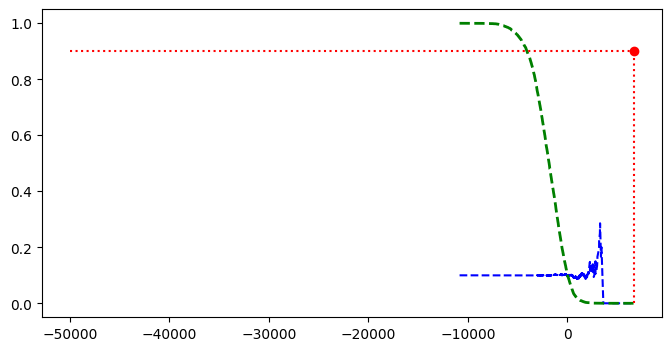

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection._validation import cross_val_predict

# Obtener los puntajes de decisión con validación cruzada
y_scores = cross_val_predict(sgd, X_train, y_train_2, cv=3, method="decision_function")

# Calcular curvas de precisión-recall
precisiones, recalls, umbrales = precision_recall_curve(y_train_2, y_scores)

# Verificar tamaños
print(f"Tamaño de precisiones: {len(precisiones)}")
print(f"Tamaño de recalls: {len(recalls)}")
print(f"Tamaño de umbrales: {len(umbrales)}")

# Verificar si existe un índice donde la precisión sea >= 90%
if np.any(precisiones >= 0.90):
    idx = np.argmax(precisiones >= 0.90)
    if idx >= len(umbrales):
        idx = len(umbrales) - 1  # Ajustar para que no exceda el tamaño
    recall_precision_90 = recalls[idx]
    umbral_para_precision_90 = umbrales[idx]
else:
    recall_precision_90 = None
    umbral_para_precision_90 = None
    print("No se encontró un umbral que garantice una precisión >= 90%")

# Graficar
plt.figure(figsize=(8,4))
plot_precision_recall_vs_umbrales(precisiones, recalls, umbrales)

if umbral_para_precision_90 is not None:
    plt.plot([umbral_para_precision_90, umbral_para_precision_90], [0.,0.9], "r:")
    plt.plot([-50000, umbral_para_precision_90], [0.9, 0.9], "r:")
    plt.plot([umbral_para_precision_90], [0.9], "ro")

plt.show()

Mirando el gráfico puedes saber que necesitas un umbral de unos ocho mil para tener una precisión
del 90% pero podemos ser más precisos usando np.argmax() para encontrar el primer índice del
máximo valor (en este caso el primer valor True). Para hacer predicciones (en el dataset train por
ahora) en vez de llamar a clasificador.predict() ejecutas las sentencias:

In [16]:
# Verificar tamaños
print(f"Tamaño de precisiones: {len(precisiones)}")
print(f"Tamaño de recalls: {len(recalls)}")
print(f"Tamaño de umbrales: {len(umbrales)}")

# Verificar si existe un índice donde la precisión sea >= 90%
if np.any(precisiones >= 0.90):
    idx = np.argmax(precisiones >= 0.90)
    if idx >= len(umbrales):
        idx = len(umbrales) - 1  # Ajustar para que no exceda el tamaño
    umbral_para_precision_90 = umbrales[idx]

    print("Umbral para alcanzar precisión del 90%:", umbral_para_precision_90)
    y_train_pred_90 = (y_scores > umbral_para_precision_90)
    print("Precisión con umbral", umbral_para_precision_90, "=", precision_score(y_train_2, y_train_pred_90))
    print("Recall con umbral", umbral_para_precision_90, "=", recall_score(y_train_2, y_train_pred_90))
else:
    umbral_para_precision_90 = None
    print("No se encontró un umbral que garantice una precisión >= 90%")

Tamaño de precisiones: 63001
Tamaño de recalls: 63001
Tamaño de umbrales: 63000
Umbral para alcanzar precisión del 90%: 6653.796725682474
Precisión con umbral 6653.796725682474 = 0.0
Recall con umbral 6653.796725682474 = 0.0


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**c) ¿Qué valores de recall vamos a tener si queremos alcanzar una precisión del 90%?**

Teniendo un recall de 0.0 no estamos cogiendo ninguna instancia positiva por lo que habría que ajustar el umbral a un valor menor

### PASO 5: LA CURVA ROC

La curva receiver operating characteristic (ROC) y la métrica AUC son otras herramientas usadas en los
clasificadores. También se utilizan para comparar varios clasificadores. Para dibujarla hay que calcular
el TPR y el FPR para diferentes valores de umbral usando la función roc_curve():

### ENTREGAR:

**a) Completa el código de la función plot_curva_roc() sustituyendo cada línea comentada por el código que la implementa**

import matplotlib.pyplot as plt

def plot_curva_roc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Dibuja los fpr y sus tpr asociados con plot()
    plt.plot([0, 1], [0, 1], 'k--')             # Dibuja una línea punteada en negro desde (0,0) a (1,1)
    plt.legend(loc="lower right", fontsize=14)    # Añade la leyenda
    plt.ylabel("TPR (Recall)")                  # Etiqueta el eje Y
    plt.xlabel("FPR")                           # Etiqueta el eje X
    plt.grid(True)                              # Activa la rejilla

**b) ¿Qué AUC tendrá un clasificador binario aleatorio? ¿Y un clasificador binario perfecto?**

Clasificador binario aleatorio: Un clasificador binario aleatorio tendrá un AUC de 0.5. Esto se debe a que su rendimiento es equivalente a lanzar una moneda al aire para hacer predicciones. La curva ROC será una línea diagonal desde (0,0) hasta (1,1), y el área bajo esta línea es 0.5.

Clasificador binario perfecto: Un clasificador binario perfecto tendrá un AUC de 1.0. Esto se debe a que puede clasificar correctamente todas las instancias positivas y negativas. La curva ROC subirá directamente desde (0,0) hasta (0,1) y luego se extenderá horizontalmente hasta (1,1), formando un área de 1.

**c) Sabiendo que puedes calcular el área bajo la curva con la función roc_auc_score(y_train_2,y_scores) añade el código en una llamada a plot_curva_roc() que genere esta gráfica:**



In [17]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_curva_roc(fpr, tpr, label=None, auc=None):
    if auc is not None:
        label = f'{label} (AUC = {auc:.2f})'  # Añade el valor del AUC a la etiqueta
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend(loc="lower right", fontsize=14)
    plt.ylabel("TPR (Recall)")
    plt.xlabel("FPR")
    plt.grid(True)

# ... (Tu código para calcular fpr, tpr, y_train_2, y_scores) ...

auc = roc_auc_score(y_train_2, y_scores)  # Calcula el AUC
plot_curva_roc(fpr, tpr, label='Tu Modelo', auc=auc)  # Llama a la función con el AUC
plt.show()

NameError: name 'fpr' is not defined

Vamos a entrenar un clasificador RandomForestClassifier y comparamos su curva ROC y su métrica
AUC con el SGDClassifier. Necesitamos los scores de cada instancia en el dataset train. Pero debido a
la manera de funcionar de Ramdom Forest no tiene decision_function(). En su lugar tiene un método
predict_proba() que devuelve un array con una fila para cada instancia y una columna para cada
clase con la que trabaja el clasificador. Cada valor representa la probabilidad de que cada instancia
pertenezca a cada clase. Por ejemplo en nuestro caso una fila de una instancia podría tener:

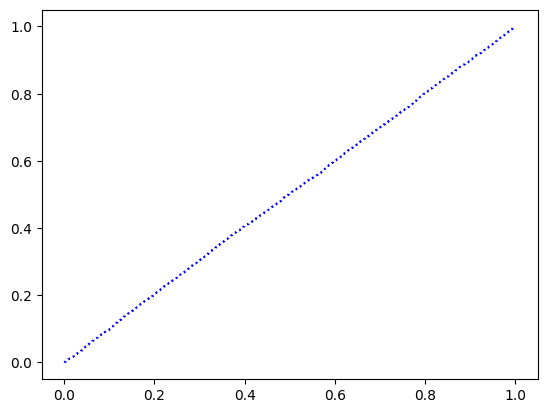

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=123)
y_probs_forest = cross_val_predict(rfc, X_train, y_train_2, cv=3, method="predict_proba")

y_scores_forest = y_probs_forest[:, 1]  # score = probabilidad de la clase positiva
fpr_forest, tpr_forest, umbrales_forest = roc_curve(y_train_2, y_scores_forest)

plt.plot(fpr, tpr, "b:", label=f"SGD (AUC: {roc_auc_score(y_train_2, y_scores):.4f})")

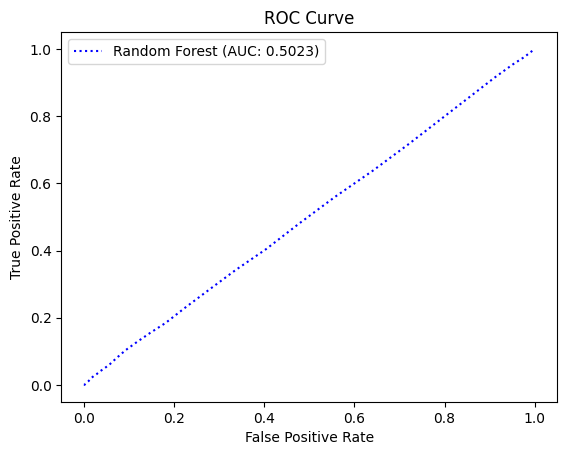

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(random_state=123)


y_probs_forest = cross_val_predict(rfc, X_train, y_train_2, cv=3, method="predict_proba")

y_scores_forest = y_probs_forest[:, 1]

fpr_forest, tpr_forest, umbrales_forest = roc_curve(y_train_2, y_scores_forest)

plt.plot(fpr_forest, tpr_forest, "b:", label=f"Random Forest (AUC: {roc_auc_score(y_train_2, y_scores_forest):.4f})")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**d) Tras dibujar el gráfico (en la línea 133) haz una llamada a plot_curva_roc() para dibujar la curva del clasificador Random Forest y muestra el gráfico para que quede como el siguiente**

**e) Basándonos en la métrica ¿Cuál de los dos clasificadores reconoce mejor el dígito 2?**

Random Forest

### PASO 6: CLASIFICACIÓN MULTICLASE

Un clasificador debe clasificar una instancia en alguna de las clases. Si hay 2 clases hablamos de un
clasificador binario. Si hay más de 2, hablamos de clasificador multiclase o multinomial. Algunos
algoritmos como Random Forest o Bayes la soportan directamente. Otros como SVM o los clasificadores
lineales son estrictamente binarios pero se pueden entrenar varios de ellos (uno para diferenciar entre
cada clase y el resto) y predecir con todos para saber cuál es la clase más probable: si tengo 3 clases se
fabrica uno para (clase1, resto), otro para (clase2,resto) y otro para (clase3, resto). Esta técnica se llama
one-versus-rest OvR.

Otra estrategia es entrenar por parejas de clases de forma que si tenemos 3 clases uno aprenda a
diferenciar (entre 1 y 2), otro (entre 1 y 3), otro (entre 2 y 3). Si tienes N clases, necesitas entrenar N x
(N -1 ) / 2 clasificadores. Esto se llama one-versus-one: OvO

Scikit-Learn detecta automáticamente cuando estás usando un algoritmo clasificador binario para
realizar una clasificación multiclase y automáticamente ejecuta ovr (excepto para SVM que usa ovo).
Vamos a probar y para ver los detalles de la decisión puedes usar el método decision_function():

In [ ]:
sgd.fit(X_train, y_train)  # y_train, no es y_train_2
print("Predicción de un 2", sgd.predict([un_digito]))
scores_de_un_digito = sgd.decision_function([un_digito])
print("scores de un_digito", scores_de_un_digito)

NameError: name 'sgd' is not defined

### ENTREGAR:

**a) En ejecutar las sentencias de la 137 a la 138 habrá tardado algo más de tiempo (si estás realizando la práctica en un jupyter notebook y has dejado este código en su propia celda)**

**¿Cuánto? ¿Cuántos modelos ha entrenado Scikit-learn? ¿Qué método ha usado?**



**b) ¿Cuántos scores devuelve la sentencia 139? ¿Cuál es la posición del más alto?**

Vamos a obtener la clase que ha obtenido un mayor score: sabiendo que cuando se entrena un
clasificador, este almacena en su atributo classes_ ordenadas por valor en algún lugar del array

In [ ]:
mayor = np.argmax(scores_de_un_digito)
print("Clases del clasificador:", sgd.classes_)
print("La clase con mayor score:", sgd.classes_[mayor])

Si quieres forzar a Scikit-Learn a usar los métodos ovo o bien ovr puedes usar las clases
OneVsOneClassifier o OneVsRestClassifier respectivamente. Debes crear una instancia del objeto pasando en la llamada un clasificador como en este código:

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(SGDClassifier(random_state=123))
ovo.fit(X_train.values, y_train)  # df.values quita cabeceras del df y no da warning

print("SGD: Prediccion de un dígito 2:", ovo.predict([un_digito]))
print("SGD: Longitud de los estimadores", len(ovo.estimators_))

# Entrenar un bosque aleatorio es más sencillo porque soporta multiclase                # Uso values para que no use cabeceras y no de warning
rfc.fit(X_train.values, y_train)

print("Random Forest: Predicción de un dígito 2:", rfc.predict([un_digito]))
print("Random Forest: Probabilidades predichas del dígito:", rfc.predict_proba([un_digito]))

**c) ¿Cuántos modelos se han entrenado en ovo? ¿Cuántos en rfc? ¿Cuál es el resultado de la línea 150? ¿Si lo hiciésemos con rfc ¿Cuál sería el resultado?**

**d) En el resultado de ejecutar la línea 154 ¿Qué probabilidad da a que el ejemplo sea un 2?**

**¿Cuál es la siguiente probabilidad más alta? ¿De qué clase se trata?**


Si queremos evaluar varios modelos lo normal será usar validación cruzada usando
cross_val_score(). Y si aplicas preproceso de datos cabe la posibilidad de que mejores la métrica.
Escalaremos los datos de train a ver si mejoramos la métrica

In [ ]:
cv1 = cross_val_score(sgd, X_train.values, y_train, cv=3, scoring="accuracy")
print("SGD: Accuracy de 3-fold CV:", cv1, f"media: {cv1.mean():.4f}")

from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_train_escalado = escalador.fit_transform(X_train.astype(np.float64))

cv2 = cross_val_score(sgd, X_train_escalado, y_train, cv=3, scoring="accuracy")
print("SGD: Accuracy de 3-folds CV tras escalar:", cv2, f"media: {cv2.mean():.4f}")

**e) ¿Cuáles son los valores de cv1 y cv2 y la media? ¿Qué mejora, si la hay, del % medio hay al escalar?**

### PASO 7: ANÁLISIS DEL ERROR

En un proyecto real además de habríamos realizado análisis exploratorio de datos, ingeniería de características y localizado el mejor modelo con la mejor configuración de manera automatizada con GridSearchCV(). Si lo hemos realizado y ya tenemos un modelo prometedor, nos falta saber si generaliza bien. Vamos a comprobar que cantidad y tipos de error comete al realizar su trabajo a través de la matriz de confusión con la función cross_val_predict() y luego confusion_matrix().


Para ver una representación visual de la matriz de confusión vamos a utilizar matplotlib.matshow() o hacer un mapa de calor

In [ ]:
X_test_escalado = escalador.transform(X_test.values)
y_test_pred = cross_val_predict(sgd, X_test_escalado, y_test, cv=3)
mc = confusion_matrix(y_test, y_test_pred)

print("Matriz de confusión de SGD:\n", mc)

La diagonal parece que tiene los valores más altos, lo que es buena señal. Podemos dividir la cantidad de errores entre el número de ocurrencias de la cada característica por si el conjunto no estuviese balanceado y así visualmente detectar clases concretas donde hay problemas. La diagonal de la matriz normalizada la ponemos a 0

In [ ]:
suma_filas = mc.sum(axis=1, keepdims=True)
mc_normalizada = mc / suma_filas

np.fill_diagonal(mc_normalizada, 0)
plt.matshow(mc_normalizada, cmap=plt.cm.gray)

plt.show()